In [1]:
import os
import numpy as np
import pandas as pd
import mne
from mne_bids import (
    find_matching_paths,
    read_raw_bids,
)
import matplotlib.pyplot as plt
import seaborn as sns

n_jobs = 12

bids_root = os.path.abspath("../..")

raw_paths = find_matching_paths(
    sessions="retrieval", tasks="mars", datatypes="ieeg", extensions="vhdr", root=bids_root
)

01 34 78
02 1 43
03 3 43
04 23 79
06 2 28


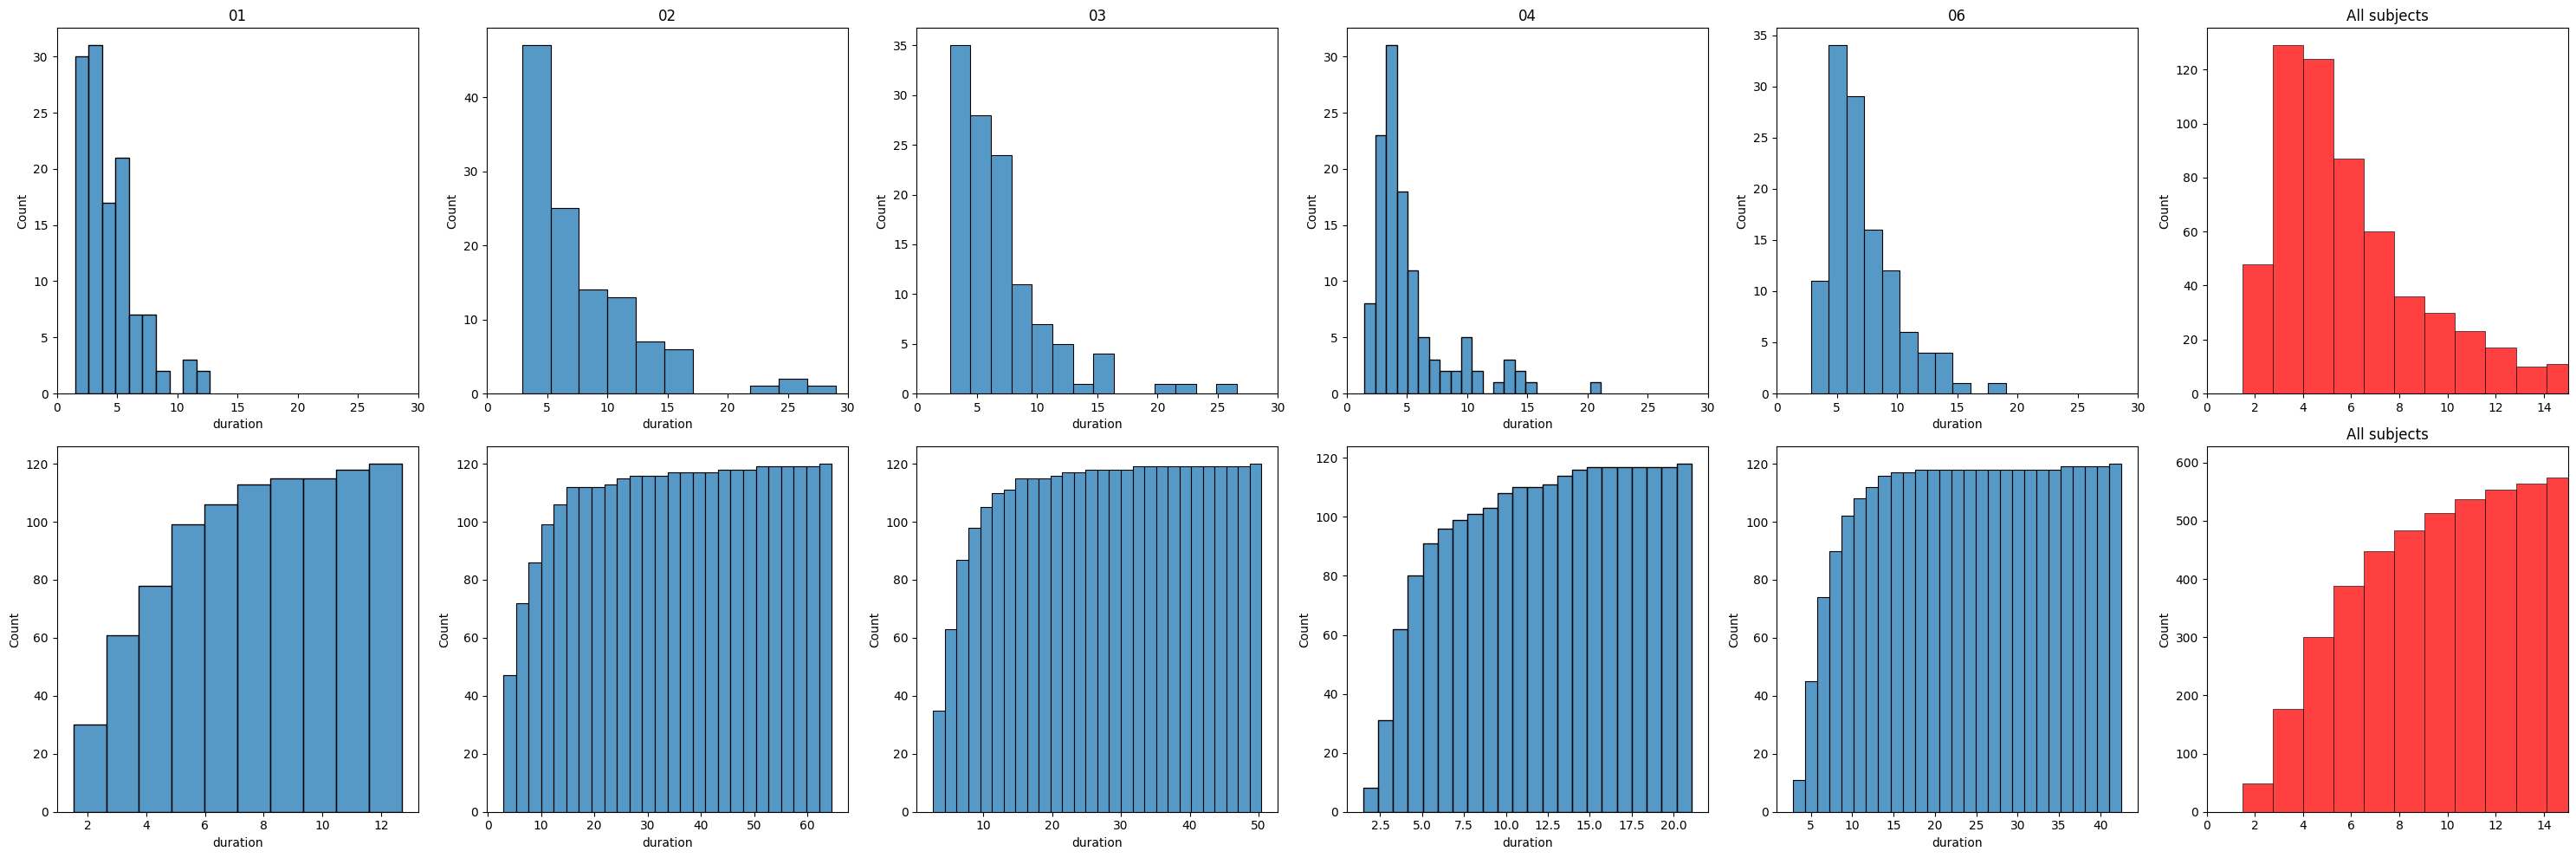

In [2]:
event_paths = [raw_path.copy().update(extension="tsv", suffix='events') for raw_path in raw_paths]

fig, axes = plt.subplots(2, len(event_paths) + 1, figsize=(30, 10))
durations = []
for ax, e in zip(axes.T, event_paths):
    df = pd.read_csv(e, sep="\t")
    df = df[df['validation'] == True]
    sns.histplot(df['duration'], ax=ax[0])
    ax[0].set_title(e.subject)
    ax[0].set_xlim(0, 30)

    n_3 = np.sum(df['duration'] < 3)
    n_5 = np.sum(df['duration'] < 5)
    print(e.subject, n_3, n_5)

    sns.histplot(df['duration'], cumulative=True ,ax=ax[1])

    durations.extend(df['duration'].values)

sns.histplot(durations, bins=50, ax=axes[0, -1], color='red')
axes[0, -1].set_title("All subjects")
axes[0, -1].set_xlim(0, 15)

sns.histplot(durations, bins=50, cumulative=True, ax=axes[1, -1], color='red')
axes[1, -1].set_title("All subjects")
axes[1, -1].set_xlim(0, 15)

plt.tight_layout()

In [95]:
r = read_raw_bids(raw_paths[0])
r.ch_names

Extracting parameters from d:\sEEG MARS\sub-01\ses-retrieval\ieeg\sub-01_ses-retrieval_task-mars_ieeg.vhdr...
Setting channel info structure...
Reading events from d:\sEEG MARS\sub-01\ses-retrieval\ieeg\sub-01_ses-retrieval_task-mars_events.tsv.
Reading channel info from d:\sEEG MARS\sub-01\ses-retrieval\ieeg\sub-01_ses-retrieval_task-mars_channels.tsv.


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\204993992.py:1: RuntimeWarning: Did not find any electrodes.tsv associated with sub-01_ses-retrieval_task-mars.

The search_str was "d:\sEEG MARS\sub-01\**\ieeg\sub-01_ses-retrieval*electrodes.tsv"
  r = read_raw_bids(raw_paths[0])
C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\204993992.py:1: RuntimeWarning: Did not find any coordsystem.json associated with sub-01_ses-retrieval_task-mars.

The search_str was "d:\sEEG MARS\sub-01\**\ieeg\sub-01_ses-retrieval*coordsystem.json"
  r = read_raw_bids(raw_paths[0])


['FOG1',
 'FOG2',
 'FOG3',
 'FOG4',
 'FOG5',
 'FOG6',
 'FOG7',
 'FOG8',
 'FOG9',
 'FOG10',
 'FOG11',
 'FOG12',
 'IAG1',
 'IAG2',
 'IAG3',
 'IAG4',
 'IAG5',
 'IAG6',
 'IAG7',
 'IAG8',
 'IAG9',
 'IAG10',
 'IAG11',
 'IAG12',
 'IAG13',
 'IAG14',
 'IAG15',
 'IAG16',
 'IAG17',
 'IAG18',
 'CAG1',
 'CAG2',
 'CAG3',
 'CAG4',
 'CAG5',
 'CAG6',
 'CAG7',
 'CAG8',
 'CAG9',
 'CAG10',
 'CAG11',
 'CAG12',
 'CPG1',
 'CPG2',
 'CPG3',
 'CPG4',
 'CPG5',
 'CPG6',
 'CPG7',
 'CPG8',
 'CPG9',
 'CPG10',
 'CPG11',
 'CPG12',
 'CPG13',
 'CPG14',
 'CPG15',
 'EX1',
 'EX2',
 'EX3',
 'EX4',
 'EX5',
 'EX6',
 'EX7',
 'MKR1+',
 'TPG1',
 'TPG2',
 'TPG3',
 'TPG4',
 'TPG5',
 'AG1',
 'AG2',
 'AG3',
 'AG4',
 'AG5',
 'AG6',
 'AG7',
 'AG8',
 'AG9',
 'AG10',
 'AG11',
 'AG12',
 'HAG1',
 'HAG2',
 'HAG3',
 'HAG4',
 'HAG5',
 'HAG6',
 'HAG7',
 'HAG8',
 'HAG9',
 'HAG10',
 'HAG11',
 'HAG12',
 'HPG1',
 'HPG2',
 'HPG3',
 'HPG4',
 'HPG5',
 'HPG6',
 'HPG7',
 'HPG8',
 'HPG9',
 'HPG10',
 'PHG1',
 'PHG2',
 'PHG3',
 'PHG4',
 'PHG5',
 'PHG6',


In [76]:
raws = [read_raw_bids(raw_path, verbose=False) for raw_path in raw_paths[1:]]
for raw in raws:
    raw.load_data()
raws[1]._data *= 1e-6
raws[2]._data *= 1e-6
ch_names = [raw.ch_names for raw in raws]
common_ch_names = set.intersection(*map(set, ch_names))
common_ch_names = common_ch_names - set(["photodiode", "ECG"])
raws = [raw.pick_channels(common_ch_names) for raw in raws]
raw = mne.concatenate_raws(raws)

C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\3229054405.py:1: RuntimeWarning: Did not find any electrodes.tsv associated with sub-02_ses-retrieval_task-mars.

The search_str was "d:\sEEG MARS\sub-02\**\ieeg\sub-02_ses-retrieval*electrodes.tsv"
  raws = [read_raw_bids(raw_path, verbose=False) for raw_path in raw_paths[1:]]
C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\3229054405.py:1: RuntimeWarning: Did not find any coordsystem.json associated with sub-02_ses-retrieval_task-mars.

The search_str was "d:\sEEG MARS\sub-02\**\ieeg\sub-02_ses-retrieval*coordsystem.json"
  raws = [read_raw_bids(raw_path, verbose=False) for raw_path in raw_paths[1:]]
C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\3229054405.py:1: RuntimeWarning: Did not find any electrodes.tsv associated with sub-03_ses-retrieval_task-mars.

The search_str was "d:\sEEG MARS\sub-03\**\ieeg\sub-03_ses-retrieval*electrodes.tsv"
  raws = [read_raw_bids(raw_path, verbose=False) for raw_path in raw_paths[1:]]
C:\Users\

Reading 0 ... 3276800  =      0.000 ...  1600.000 secs...
Reading 0 ... 2863946  =      0.000 ...  1398.411 secs...
Reading 0 ... 5493832  =      0.000 ...  2682.535 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [77]:
raw.load_data()
raw.resample(1000)

# filter
raw.filter(.1, None, picks='seeg', fir_design='firwin', n_jobs=n_jobs)
# low-pass filter < 250 Hz
raw.filter(None, 300, picks='seeg', fir_design='firwin', n_jobs=n_jobs)

# remove power line 50 Hz and harmonics
for ifreq in np.arange(50, 151, 50):
    raw.notch_filter(ifreq, 
                     picks='seeg', 
                     notch_widths=2,
                     method='iir', 
                     iir_params={'order':6, 'ftype':'butter'},
                     n_jobs=n_jobs)

raw_seeg = raw.copy()
good_channels = list(set(raw_seeg.ch_names) - set(raw_seeg.info['bads']) - set(['photodiode']))
#raw_seeg.info['bads'] = []
raw_seeg.set_eeg_reference(good_channels, ch_type='seeg')

Filtering raw data in 4 contiguous segments
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    6.3s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    6.4s finished


Filtering raw data in 4 contiguous segments
Setting up low-pass filter at 3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 300.00 Hz
- Upper transition bandwidth: 75.00 Hz (-6 dB cutoff frequency: 337.50 Hz)
- Filter length: 45 samples (0.045 s)



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    9.4s remaining:    0.4s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    9.7s finished


Filtering raw data in 4 contiguous segments
Setting up band-stop filter from 48 - 52 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 48.50, 51.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    2.4s finished


Setting up band-stop filter from 48 - 52 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 48.50, 51.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s


Setting up band-stop filter from 48 - 52 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 48.50, 51.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    1.8s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s


Setting up band-stop filter from 48 - 52 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 48.50, 51.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    3.7s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    3.7s finished


Filtering raw data in 4 contiguous segments
Setting up band-stop filter from 98 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 98.50, 101.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    2.4s finished


Setting up band-stop filter from 98 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 98.50, 101.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s


Setting up band-stop filter from 98 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 98.50, 101.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    1.6s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s


Setting up band-stop filter from 98 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 98.50, 101.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    3.8s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    3.8s finished


Filtering raw data in 4 contiguous segments
Setting up band-stop filter from 1.5e+02 - 1.5e+02 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 148.50, 151.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.4s


Setting up band-stop filter from 1.5e+02 - 1.5e+02 Hz


[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    2.2s finished



IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 148.50, 151.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.3s


Setting up band-stop filter from 1.5e+02 - 1.5e+02 Hz


[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    1.8s finished



IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 148.50, 151.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.0s


Setting up band-stop filter from 1.5e+02 - 1.5e+02 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 148.50, 151.50 Hz: -6.02, -6.02 dB



[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done  40 out of  42 | elapsed:    4.3s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    4.4s finished


Applying a custom ('sEEG',) reference.


<RawBrainVision | sub-02_ses-retrieval_task-mars_ieeg.eeg, 42 x 5680948 (5680.9 s), ~1.78 GB, data loaded>

In [79]:
events, event_id = mne.events_from_annotations(raw_seeg)
epochs = mne.Epochs(raw_seeg, events, event_id=event_id, tmin=-1, tmax=2, baseline=None, detrend=1, event_repeated='drop', reject_by_annotation=True).drop_bad()

epochs

Used Annotations descriptions: ['Always', 'Current', 'Distant Futur', 'Distant Past', 'Futur', 'Never', 'Past']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.


Not setting metadata
305 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 305 events and 3001 original time points ...
7 bad epochs dropped


<Epochs | 298 events (all good), -1 – 2 s (baseline off), ~47 kB, data not loaded,
 'Always': 50
 'Current': 51
 'Distant Futur': 40
 'Distant Past': 41
 'Futur': 32
 'Never': 47
 'Past': 37>

In [42]:
picks = ['HAD1', 'HAD2', 'AD3', 'IMD1']

In [92]:
for pick in picks:
    epochs.plot_image(picks=pick, colorbar=False, show=False)

Using data from preloaded Raw for 293 events and 7001 original time points ...
Not setting metadata
293 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 293 events and 7001 original time points ...


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\174177798.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=pick, colorbar=False, show=False)


Not setting metadata
293 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 293 events and 7001 original time points ...


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\174177798.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=pick, colorbar=False, show=False)


Not setting metadata
293 matching events found
No baseline correction applied
0 projection items activated


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\174177798.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=pick, colorbar=False, show=False)


Using data from preloaded Raw for 293 events and 7001 original time points ...
Not setting metadata
293 matching events found
No baseline correction applied
0 projection items activated


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\174177798.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=pick, colorbar=False, show=False)


In [ ]:
%matplotlib qt
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(picks), 2, figsize=(20, 20))

for ax, pick in zip(axes, picks):
    epochs.plot_image(axes=ax, picks=pick, colorbar=False, show=False)

plt.tight_layout()
plt.show()

Using data from preloaded Raw for 298 events and 3001 original time points ...
Not setting metadata
298 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 298 events and 3001 original time points ...


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\3685607248.py:9: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(axes=ax, picks=pick, colorbar=False, show=False)


Not setting metadata
298 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 298 events and 3001 original time points ...


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\3685607248.py:9: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(axes=ax, picks=pick, colorbar=False, show=False)


Not setting metadata
298 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 298 events and 3001 original time points ...


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\3685607248.py:9: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(axes=ax, picks=pick, colorbar=False, show=False)


Not setting metadata
298 matching events found
No baseline correction applied
0 projection items activated


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\3685607248.py:9: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(axes=ax, picks=pick, colorbar=False, show=False)


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mne.stats import permutation_cluster_test


def plot_f_test(epochs, picks, conditions, condition_labels=['Condition 1', 'Condition 2']):
    epochs_ = epochs.copy().load_data().crop(-0.5, 2).resample(500)
    times = epochs_.times

    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
    fig.suptitle("Channel : " + picks[0])

    line_color = 'grey'
    unit = 'mV'
    # Plot signals
    ds = []
    conditions_data = []
    for condition, condition_name  in zip(conditions, condition_labels):
        condition_data = epochs_[condition].get_data(picks=picks, units=unit)[:,0,:]
        conditions_data.append(condition_data)

        for epoch_data in condition_data:
            for t, data in zip(times, epoch_data):
                ds.append({'condition': condition_name, 'time': t, 'data': data})
        df = pd.DataFrame(ds)

    ax = axes[0]
    sns.lineplot(x='time', y='data', data=df, ax=ax, hue='condition', hue_order=condition_labels, palette='tab10')
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    ax.vlines(0, y_lims[0]*2,  y_lims[1]*2, color=line_color)
    ax.hlines(0, x_lims[0]*2,  x_lims[1]*2, color=line_color)
    ax.set_ylim(y_lims)
    ax.set_xlim(x_lims)
    ax.set_ylabel(f"Amplitude ({unit})")

    # Plot contrast
    ax = axes[1]
    diff = conditions_data[0].mean(axis=0) - conditions_data[1].mean(axis=0)
    sns.lineplot(x=times, y=diff, ax=ax, color='teal')
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    ax.vlines(0, y_lims[0]*2,  y_lims[1]*2, color=line_color)
    ax.hlines(0, x_lims[0]*2,  x_lims[1]*2, color=line_color)
    ax.set_ylim(y_lims)
    ax.set_xlim(x_lims)
    ax.set_ylabel(f"Amplitude difference ({unit})")


    # Plot permutation test
    ax = axes[2]
    threshold = None
    T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
        conditions_data,
        n_permutations=1000,
        threshold=threshold,
        tail=1,
        n_jobs=None,
        out_type="mask",
    )

    h = None
    for i_c, c in enumerate(clusters):
        c = c[0]
        start = c.start
        stop = c.stop - 1
        if cluster_p_values[i_c] <= 0.05:
            h = ax.axvspan(times[start], times[stop], color="r", alpha=0.3)
        else:
            ax.axvspan(times[start], times[stop], color=(0.3, 0.3, 0.3), alpha=0.3)

    sns.lineplot(x=times, y=T_obs, ax=ax, color='green')
    if h is not None:
        ax.legend((h,), ("cluster p-value < 0.05",))
    ax.set_xlabel("time (s)")
    ax.set_ylabel("f-values")

    y_lims = ax.get_ylim()
    ax.vlines(0, y_lims[0]*2,  y_lims[1]*2, color=line_color)
    ax.set_ylim(y_lims)
    return fig

In [96]:
for pick in picks:
    for condition_label, condition,  in [('Futur', ["Futur", "Distant Futur"]), ('Past', ["Past", "Distant Past"])]:
        conditions = [['Current'], condition]
        fig = plot_f_test(epochs, [pick], conditions, condition_labels=['Current', condition_label])

Using data from preloaded Raw for 293 events and 7001 original time points ...
Using a threshold of 3.920124
stat_fun(H1): min=4.697765233623493e-08 max=5.307928513307341
Running initial clustering …
Found 7 clusters


100%|██████████| Permuting : 999/999 [00:01<00:00,  823.95it/s]


Using data from preloaded Raw for 293 events and 7001 original time points ...
Using a threshold of 3.917550
stat_fun(H1): min=1.3082983883276633e-05 max=11.415962017149399
Running initial clustering …
Found 15 clusters


100%|██████████| Permuting : 999/999 [00:01<00:00,  874.92it/s]


Using data from preloaded Raw for 293 events and 7001 original time points ...
Using a threshold of 3.920124
stat_fun(H1): min=1.008420150665036e-06 max=7.437347906151619
Running initial clustering …
Found 18 clusters


100%|██████████| Permuting : 999/999 [00:01<00:00,  870.01it/s]


Using data from preloaded Raw for 293 events and 7001 original time points ...
Using a threshold of 3.917550
stat_fun(H1): min=9.358876847932898e-07 max=4.592332413181218
Running initial clustering …
Found 2 clusters


100%|██████████| Permuting : 999/999 [00:01<00:00,  853.29it/s]


Using data from preloaded Raw for 293 events and 7001 original time points ...
Using a threshold of 3.920124
stat_fun(H1): min=2.549933058612099e-07 max=3.7771158964182416
Running initial clustering …
Found 0 clusters
Using data from preloaded Raw for 293 events and 7001 original time points ...


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\2858194202.py:55: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(


Using a threshold of 3.917550
stat_fun(H1): min=1.2347179425395306e-05 max=8.39792505437348
Running initial clustering …
Found 12 clusters


100%|██████████| Permuting : 999/999 [00:01<00:00,  939.17it/s]


Using data from preloaded Raw for 293 events and 7001 original time points ...
Using a threshold of 3.920124
stat_fun(H1): min=1.2799923148194246e-06 max=2.7631882614178718
Running initial clustering …
Found 0 clusters
Using data from preloaded Raw for 293 events and 7001 original time points ...


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\2858194202.py:55: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(


Using a threshold of 3.917550
stat_fun(H1): min=3.373429931158963e-07 max=3.67654560810604
Running initial clustering …
Found 0 clusters


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\2858194202.py:55: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(


In [88]:
from mne import Epochs
from mne.time_frequency import EpochsTFRArray

tmin = -2
tmax = 5

events, event_id = mne.events_from_annotations(raw_seeg)
epochs = mne.Epochs(raw_seeg, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, detrend=None, event_repeated='drop', reject_by_annotation=True).drop_bad()

freqs = np.arange(80, 120.0, 5) # tous les 5hz bande de 10Hz de 75 a 150 Hz
bandwidth =  5


data = np.zeros(
    (len(epochs), len(picks), freqs.size, int((tmax - tmin) * raw.info['sfreq']) + 1), dtype=complex
)
data_norm = np.zeros(
    (len(epochs), len(picks), freqs.size, int((tmax - tmin) * raw.info['sfreq']) + 1), dtype=complex
)
for idx, freq in enumerate(freqs):
    # Filter raw data and re-epoch to avoid the filter being longer than
    # the epoch data for low frequencies and short epochs, such as here.
    raw_filter = raw_seeg.copy()
    raw_filter.pick(picks)
    raw_filter.filter(
        l_freq=freq - bandwidth / 2,
        h_freq=freq + bandwidth / 2,
    )
    raw_filter.apply_hilbert() # power puis 
    epochs_hilb = Epochs(
        raw_filter, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, event_repeated='drop',
    ).drop_bad()
    data[:, :, idx] = epochs_hilb.get_data()

power_data = np.abs(data)# ** 2 # Puissance instantanée
power_norm_data = power_data / np.mean(power_data, axis=-1, keepdims=True) # Norm

power = EpochsTFRArray(epochs_hilb.info, power_data, epochs.times, freqs, events=epochs_hilb.events, event_id=event_id, method="hilbert")
power_norm = EpochsTFRArray(epochs_hilb.info, power_norm_data, epochs.times, freqs, events=epochs_hilb.events, event_id=event_id, method="hilbert")

Used Annotations descriptions: ['Always', 'Current', 'Distant Futur', 'Distant Past', 'Futur', 'Never', 'Past']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
305 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 305 events and 7001 original time points ...
12 bad epochs dropped
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 78 - 82 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 77.50
- Lower transition bandwidth: 19.38 Hz (-6 dB cutoff frequency: 67.81 Hz)
- Upper passband edge: 82.50 Hz
- Upper transition bandwidth: 20.62 Hz (-6 dB cutoff frequency: 92.81 Hz)
- Filter length: 171 samples (0.171 s)

Multiple

In [89]:
def get_reordered_indices(lst, order):
    # Create a dictionary to map each element in the order to its priority index
    order_dict = {value: index for index, value in enumerate(order)}
    
    # Sort the indices of the list based on the corresponding element's priority in order_dict
    return sorted(range(len(lst)), key=lambda i: order_dict.get(lst[i], float('inf')))

order = get_reordered_indices(epochs_hilb.events[:,2], [10004,10007,10002,10005,10003, 10001, 10006])
h_lines_y = np.where(np.diff(epochs_hilb.events[order][:,2]) != 0)[0]

In [90]:
data_ = np.mean(power_norm.get_data(), axis=2)
epoch_high_freq = mne.EpochsArray(data_, epochs_hilb.info, tmin=epochs_hilb.times[0], events=epochs_hilb.events, event_id=event_id, baseline=None)
epoch_high_freq.apply_baseline((-0.5, -0.1))

for pick in picks:
    fig = epoch_high_freq.plot_image(picks=pick, order=order, show=False)[0]
    ax = fig.get_axes()[0]
    for y in h_lines_y:
        ax.hlines(y, *ax.get_xlim(), color='black', linestyle='--', linewidth=1)
    plt.show()

Not setting metadata
293 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)
Not setting metadata
293 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
293 matching events found
No baseline correction applied
0 projection items activated


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\2261783762.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  fig = epoch_high_freq.plot_image(picks=pick, order=order, show=False)[0]


Not setting metadata
293 matching events found
No baseline correction applied
0 projection items activated


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\2261783762.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  fig = epoch_high_freq.plot_image(picks=pick, order=order, show=False)[0]


Not setting metadata
293 matching events found
No baseline correction applied
0 projection items activated


C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\2261783762.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  fig = epoch_high_freq.plot_image(picks=pick, order=order, show=False)[0]
C:\Users\ferat\AppData\Local\Temp\ipykernel_21632\2261783762.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  fig = epoch_high_freq.plot_image(picks=pick, order=order, show=False)[0]
